### 0. Read the data

Read the data from the `energy.csv` file and store it in a DataFrame called `energy`.

In [1]:
import pandas as pd
import numpy as np

energy = pd.read_csv("energy.csv")

energy.head()

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,12,31,23,0
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,1,1,0,1
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,1,1,1,1
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,1,1,2,1
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,1,1,3,1


In [2]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8737 entries, 0 to 8736
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      8737 non-null   object 
 1   power_demand  8737 non-null   float64
 2   nuclear       8737 non-null   float64
 3   gas           8737 non-null   float64
 4   solar         6345 non-null   float64
 5   hydro         8737 non-null   float64
 6   coal          8588 non-null   float64
 7   wind          8737 non-null   float64
 8   spot_price    8737 non-null   float64
 9   year          8737 non-null   int64  
 10  month         8737 non-null   int64  
 11  day           8737 non-null   int64  
 12  hour          8737 non-null   int64  
 13  weekday       8737 non-null   int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 955.7+ KB


### 1. Convert the `weekday` column from a number to a string (1 point)

Knowing that 0 represents Monday, 1 represents Tuesday, etc., convert the `weekday` column from a number to a string. 


In [3]:
#Converting the Week day number to names of weekday
dict_week_name = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
energy["weekday"] = energy["weekday"].map(lambda m: dict_week_name[m])

#display the new dataframe with weekday names
energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
3076,2019-05-09 03:00:00+00:00,23481.4,6039.8,2362.0,15.8,1780.3,305.0,10058.1,37.07,2019,5,9,3,Thursday
8537,2019-12-22 16:00:00+00:00,24801.9,4360.4,982.1,201.7,7229.3,NaN,10702.5,2.30,2019,12,22,16,Sunday
6624,2019-10-03 23:00:00+00:00,23687.1,6874.1,6889.5,NaN,724.3,730.0,3868.6,50.00,2019,10,3,23,Thursday
6667,2019-10-05 18:00:00+00:00,27706.4,6265.2,9126.0,15.9,1887.6,703.4,2444.0,54.12,2019,10,5,18,Saturday
991,2019-02-11 06:00:00+00:00,32488.9,7121.8,4976.1,6.5,4201.2,2851.9,5533.6,59.23,2019,2,11,6,Monday


### 2. Same but for months (1 point)

In [4]:
#dictionary for month numbers and names
dict_month_name = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
energy["month"] = energy["month"].map(lambda m: dict_month_name[m])

#display the energy dataframe with month numbers as month names
energy.sample(5)

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,month,day,hour,weekday
4484,2019-07-06 19:00:00+00:00,30330.0,6946.3,9542.5,77.6,2279.9,535.0,4359.9,53.49,2019,July,6,19,Saturday
5010,2019-07-28 17:00:00+00:00,26077.9,6909.6,7961.1,1361.7,1392.8,652.0,2430.3,46.42,2019,July,28,17,Sunday
1602,2019-03-08 17:00:00+00:00,29675.1,7097.4,5316.9,351.7,3856.9,1529.1,2872.5,55.33,2019,March,8,17,Friday
4402,2019-07-03 09:00:00+00:00,35542.1,6938.8,10789.9,3047.2,3829.8,1330.0,2360.1,53.70,2019,July,3,9,Wednesday
5944,2019-09-05 15:00:00+00:00,33639.4,6924.2,5964.3,2486.8,1346.7,270.0,10342.2,40.46,2019,September,5,15,Thursday


### 3. What's the percentage of *unique* days in the total period in which we had at least one hour with a price below 10 euros? (1 point)

I'm not asking for the percentage of days of the month (represented in the column `day`), but the percentage of *unique* dates in the total period.

Maybe it's interesting to build a new column with the date, not the datetime. You can do this with the `pd.to_datetime` function. Or you can concat columns:

In the end you'll need a column representing the date, not the datetime, not the year, month, day, etc.

In [5]:
# splitting the datetime to date
energy["datetime"] = pd.to_datetime(energy["datetime"])
energy["date"] = energy["datetime"].dt.date

# applying the filter condition  for getting the rows with atleast 1 hr and price with less than 1- euros
total_period = energy[
    (energy['spot_price'] < 10)
]


In [6]:
len(total_period['date'].unique())


16

In [7]:
len(energy['date'].unique())

365

In [8]:

#calculating the percentage for the unique days
percentage_of_unique_days = (len(total_period['date'].unique())/(len(energy['date'].unique())))*100

percentage_of_unique_days

4.383561643835616

### 4. How many hours per month, in average, do we have a price above the monthly average? And below? (1 point)

In [9]:
month_average = energy.groupby("month")["spot_price"].mean()
month_average

month
April        50.403611
August       44.951815
December     33.700555
February     54.020491
January      61.959852
July         51.464301
June         47.161236
March        48.836116
May          48.393992
November     42.187181
October      47.152325
September    42.130111
Name: spot_price, dtype: float64

In [10]:
energy_mth_avg = energy[[("spot_price"), ("month"), ("day"), ("hour")]]
energy_mth_avg

,spot_price,month,day,hour
0,66.88,December,31,23
1,66.88,January,1,0
2,66.00,January,1,1
3,63.64,January,1,2
4,58.85,January,1,3
...,...,...,...,...
8732,47.50,December,30,19
8733,46.42,December,30,20
8734,42.76,December,30,21
8735,40.88,December,30,22


In [11]:
energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])
energy_mth_avg

/var/folders/t4/ynlbj3nj7szbxd20pykw5hx40000gn/T/ipykernel_51130/3064769342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])


,spot_price,month,day,hour,monthly_avg
0,66.88,December,31,23,33.700555
1,66.88,January,1,0,61.959852
2,66.00,January,1,1,61.959852
3,63.64,January,1,2,61.959852
4,58.85,January,1,3,61.959852
...,...,...,...,...,...
8732,47.50,December,30,19,33.700555
8733,46.42,December,30,20,33.700555
8734,42.76,December,30,21,33.700555
8735,40.88,December,30,22,33.700555


In [12]:
energy_mth_avg["above_avg"] = np.where(
    energy_mth_avg["spot_price"] >= energy_mth_avg["monthly_avg"],
    1,
    0
)
energy_mth_avg

/var/folders/t4/ynlbj3nj7szbxd20pykw5hx40000gn/T/ipykernel_51130/1912846339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["above_avg"] = np.where(


,spot_price,month,day,hour,monthly_avg,above_avg
0,66.88,December,31,23,33.700555,1
1,66.88,January,1,0,61.959852,1
2,66.00,January,1,1,61.959852,1
3,63.64,January,1,2,61.959852,1
4,58.85,January,1,3,61.959852,0
...,...,...,...,...,...,...
8732,47.50,December,30,19,33.700555,1
8733,46.42,December,30,20,33.700555,1
8734,42.76,December,30,21,33.700555,1
8735,40.88,December,30,22,33.700555,1


In [13]:
month_average = energy.groupby("month")["spot_price"].mean()

energy_mth_avg = energy[[("spot_price"), ("month"), ("day"), ("hour")]]

# New column containing the monthly average

energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])

# New column with a value of 1 if spot_price is over monthly_average

energy_mth_avg["above_avg"] = np.where(
    energy_mth_avg["spot_price"] >= energy_mth_avg["monthly_avg"],
    1,
    0
)

# New column with a value of 1 if spot_price is under monthly_average

energy_mth_avg["below_avg"] = np.where(
    energy_mth_avg["spot_price"] < energy_mth_avg["monthly_avg"],
    1,
    0
)

print("Total hours above the monthly average per month on average:")
print(energy_mth_avg["above_avg"].sum()/12)

print("Total hours below the monthly average per month on average:")
print(energy_mth_avg["below_avg"].sum()/12)

Total hours above the monthly average per month on average:
415.0833333333333
Total hours below the monthly average per month on average:
313.0


/var/folders/t4/ynlbj3nj7szbxd20pykw5hx40000gn/T/ipykernel_51130/3672914550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["monthly_avg"] = energy_mth_avg['month'].map(lambda m: month_average[m])
/var/folders/t4/ynlbj3nj7szbxd20pykw5hx40000gn/T/ipykernel_51130/3672914550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_mth_avg["above_avg"] = np.where(
/var/folders/t4/ynlbj3nj7szbxd20pykw5hx40000gn/T/ipykernel_51130/3672914550.py:19: SettingWithCopyWarning: 
A value is trying t

### 5. Several questions (1 point)

Qualitative questions:

* Is `gas` generation higher or lower than its hourly average when `wind` generation is above its hourly average?
* Is the `spot_price` higher or lower than its hourly average when `solar` generation is above hourly its average?
* Is the `spot_price` higher or lower than its monthly average when `power_demand` is above its monthly average?


In [14]:
filled_energy = energy.fillna(0)

gas_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["gas"]
    .mean()
)

gas_hourly_average

{0: 4183.886813186813,
 1: 4033.03489010989,
 2: 4034.5508241758243,
 3: 4175.917307692307,
 4: 4790.313736263736,
 5: 5615.938186813187,
 6: 6277.389010989012,
 7: 6651.648901098902,
 8: 6749.31456043956,
 9: 6724.511538461539,
 10: 6675.751923076924,
 11: 6600.661538461538,
 12: 6487.5939560439565,
 13: 6363.551923076923,
 14: 6274.885439560439,
 15: 6366.893681318681,
 16: 6552.301373626374,
 17: 6768.662087912088,
 18: 6961.5901098901095,
 19: 7030.3439560439565,
 20: 6814.640384615385,
 21: 6234.39065934066,
 22: 5284.233791208791,
 23: 4535.583835616439}

In [15]:
gas_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["gas"]
    .mean()
)
gas_hourly_average

{0: 4183.886813186813,
 1: 4033.03489010989,
 2: 4034.5508241758243,
 3: 4175.917307692307,
 4: 4790.313736263736,
 5: 5615.938186813187,
 6: 6277.389010989012,
 7: 6651.648901098902,
 8: 6749.31456043956,
 9: 6724.511538461539,
 10: 6675.751923076924,
 11: 6600.661538461538,
 12: 6487.5939560439565,
 13: 6363.551923076923,
 14: 6274.885439560439,
 15: 6366.893681318681,
 16: 6552.301373626374,
 17: 6768.662087912088,
 18: 6961.5901098901095,
 19: 7030.3439560439565,
 20: 6814.640384615385,
 21: 6234.39065934066,
 22: 5284.233791208791,
 23: 4535.583835616439}

In [16]:
## Exercise 5, data preparation
## Create dictionaries each storing average values per hour or month

filled_energy = energy.fillna(0)

gas_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["gas"]
    .mean()
)

wind_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["wind"]
    .mean()
)

solar_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["solar"]
    .mean()
)

spot_price_hourly_average = dict(
    filled_energy
    .groupby("hour")
    ["spot_price"]
    .mean()
)

spot_price_monthly_average = dict(
    filled_energy
    .groupby("month")
    ["spot_price"]
    .mean()
)

power_demand_monthly_average = dict(
    filled_energy
    .groupby("month")
    ["power_demand"]
    .mean()
)

## create new columns in the dataset showing average values per hour/month as calculated above

energy_hr_avg = filled_energy

energy_hr_avg["wind_hr_avg"] = filled_energy["hour"].map(lambda m: wind_hourly_average[m])
energy_hr_avg["gas_hr_avg"] = filled_energy["hour"].map(lambda m: gas_hourly_average[m])
energy_hr_avg["solar_hr_avg"] = filled_energy["hour"].map(lambda m: solar_hourly_average[m])
energy_hr_avg["spot_hr_avg"] = filled_energy["hour"].map(lambda m: spot_price_hourly_average[m])
energy_hr_avg["spot_mth_avg"] = filled_energy["month"].map(lambda m: spot_price_monthly_average[m])
energy_hr_avg["pd_mth_avg"] = filled_energy["month"].map(lambda m: power_demand_monthly_average[m])

In [17]:
## Exercise 5_1:
## Is gas generation higher or lower than its hourly average when wind generation is above its hourly average?

## Create a working copy of the dataset

energy_gas_wind = energy_hr_avg
energy_gas_wind

,datetime,power_demand,nuclear,gas,solar,hydro,coal,wind,spot_price,year,...,day,hour,weekday,date,wind_hr_avg,gas_hr_avg,solar_hr_avg,spot_hr_avg,spot_mth_avg,pd_mth_avg
0,2018-12-31 23:00:00+00:00,23251.2,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,66.88,2018,...,31,23,Monday,2018-12-31,6389.946301,4535.583836,0.812329,45.953123,33.700555,27926.668377
1,2019-01-01 00:00:00+00:00,22485.0,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,66.88,2019,...,1,0,Tuesday,2019-01-01,6251.491758,4183.886813,0.674451,43.228049,61.959852,31420.319758
2,2019-01-01 01:00:00+00:00,20977.0,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,66.00,2019,...,1,1,Tuesday,2019-01-01,6092.408791,4033.034890,0.623901,41.596648,61.959852,31420.319758
3,2019-01-01 02:00:00+00:00,19754.2,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,63.64,2019,...,1,2,Tuesday,2019-01-01,5931.372527,4034.550824,0.592033,40.770907,61.959852,31420.319758
4,2019-01-01 03:00:00+00:00,19320.6,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,58.85,2019,...,1,3,Tuesday,2019-01-01,5801.614835,4175.917308,0.565385,41.056181,61.959852,31420.319758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,2019-12-30 19:00:00+00:00,31160.6,7106.3,4400.0,0.1,7910.8,685.0,2013.5,47.50,2019,...,30,19,Monday,2019-12-30,6763.455769,7030.343956,16.397802,53.990357,33.700555,27926.668377
8733,2019-12-30 20:00:00+00:00,31152.9,7106.3,4832.3,0.0,7517.6,681.0,2096.7,46.42,2019,...,30,20,Monday,2019-12-30,6775.510165,6814.640385,1.479121,52.152335,33.700555,27926.668377
8734,2019-12-30 21:00:00+00:00,29151.0,7105.3,4467.0,0.0,7080.2,698.0,2028.3,42.76,2019,...,30,21,Monday,2019-12-30,6680.992308,6234.390659,1.393407,49.537253,33.700555,27926.668377
8735,2019-12-30 22:00:00+00:00,26989.6,7107.2,4672.2,0.0,6716.1,626.0,2031.8,40.88,2019,...,30,22,Monday,2019-12-30,6538.888462,5284.233791,0.961538,48.440000,33.700555,27926.668377


In [18]:
## Exercise 5_1:
## Is gas generation higher or lower than its hourly average when wind generation is above its hourly average?

## Create a working copy of the dataset

energy_gas_wind = energy_hr_avg

## Create two new columns in the dataset comparing the average hourly wind/gas production (previous step)
## with the actual wind/gas production

energy_gas_wind["wind_above_avg"] = np.where(

   energy_gas_wind["wind"] > energy_gas_wind["wind_hr_avg"],
    "above",
    "below"
)

energy_gas_wind["gas_above_avg"] = np.where(

    energy_gas_wind["gas"] > energy_gas_wind["gas_hr_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when wind production was above hourly average

energy_gas_wind = energy_gas_wind[energy_gas_wind["wind_above_avg"] == "above"]

## check how many times the hourly gas production was above or below its average:
gas_above = energy_gas_wind[energy_gas_wind["gas_above_avg"]=="above"]["gas_above_avg"].count()
gas_below = energy_gas_wind[energy_gas_wind["gas_above_avg"]=="below"]["gas_above_avg"].count()

print("When wind generation was above its hourly average, ")
print(f"gas production was higher than its hourly average {gas_above} times.")
print(f"gas production was lower than its hourly average {gas_below} times.")

When wind generation was above its hourly average, 
gas production was higher than its hourly average 748 times.
gas production was lower than its hourly average 2864 times.


In [19]:
## Exercise 5_2
## Is the spot_price higher or lower than its hourly average when solar generation is above hourly its average?

## Create a working copy of the dataset

energy_spot_solar = energy_hr_avg

## Create a new column in the dataset comparing the average hourly solar production 
## with the actual production and another column comparing the spot price with the average hourly
## spot price.

energy_spot_solar["solar_above_avg"] = np.where(

   energy_spot_solar["solar"] > energy_spot_solar["solar_hr_avg"],
    "above",
    "below"
)

energy_spot_solar["spot_above_avg"] = np.where(

   energy_spot_solar["spot_price"] > energy_spot_solar["spot_hr_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when solar production was above hourly average

energy_spot_solar = energy_spot_solar[energy_spot_solar["solar_above_avg"] == "above"]

## check how many times the hourly spot price was above or below its average:
spot_above = energy_spot_solar[energy_spot_solar["spot_above_avg"]=="above"]["spot_above_avg"].count()
spot_below = energy_spot_solar[energy_spot_solar["spot_above_avg"]=="below"]["spot_above_avg"].count()

print("When solar generation was above its hourly average, ")
print(f"spot price was higher than its hourly average {spot_above} times.")
print(f"spot price was lower than its hourly average {spot_below} times.")

When solar generation was above its hourly average, 
spot price was higher than its hourly average 1590 times.
spot price was lower than its hourly average 1656 times.


In [20]:
## Exercise 5_3
## Is the spot_price higher or lower than its monthly average when power_demand is above its monthly average?

## Create a working copy of the dataset

energy_spot_demand = energy_hr_avg

## Create a new column in the dataset comparing the average monthly power demand 
## with the actual power demand and another column comparing the average monthly spot price
## with the actual spot price.

energy_spot_demand["pd_above_avg"] = np.where(

  energy_spot_demand["power_demand"] > energy_spot_demand["pd_mth_avg"],
    "above",
    "below"
)

energy_spot_demand["m_spot_above_avg"] = np.where(

    energy_spot_demand["spot_price"] > energy_spot_demand["spot_mth_avg"],
    "above",
    "below"
)

## adjust the dataset to only include data points when power demand was above monthly average

energy_spot_demand = energy_spot_demand[energy_spot_demand["pd_above_avg"] == "above"]

m_spot_above = energy_spot_demand[energy_spot_demand["m_spot_above_avg"]=="above"]["m_spot_above_avg"].count()
m_spot_below = energy_spot_demand[energy_spot_demand["m_spot_above_avg"]=="below"]["m_spot_above_avg"].count()

print("When power demand was above its monthly average, ")
print(f"spot price was higher than its monthly average {m_spot_above} times.")
print(f"spot price was lower than its monthly average {m_spot_below} times.")

When power demand was above its monthly average, 
spot price was higher than its monthly average 3521 times.
spot price was lower than its monthly average 988 times.


### 6. Understanding types of power generation (1 point)

The different types of power generation are:
* `nuclear`: nuclear power plants
* `hydro`: hydroelectric power plants
* `wind`: wind power plants
* `solar`: solar power plants
* `gas`: gas power plants
* `coal`: coal power plants

6.1. What's the average contribution of each type of power generation in percentage to the total generation, in the whole period?

6.2. What was the average contribution of each type power generation in percentage in the most expensive month?

6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

In [21]:
# 6.1. What's the average contribution of each type of power generation in percentage to the total generation,
    # in the whole period?

total_energy_gen = energy[[("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind")]].fillna(0)

total_energy_gen["total_gen"] = total_energy_gen["nuclear"] + total_energy_gen["gas"] + total_energy_gen["solar"] + total_energy_gen["hydro"] + total_energy_gen["coal"] + total_energy_gen["wind"]

for x in range(6):
    
    total_energy_gen[f"%_{total_energy_gen.columns[x]}"] = (total_energy_gen[total_energy_gen.columns[x]] / total_energy_gen["total_gen"]) * 100

total_energy_gen

,nuclear,gas,solar,hydro,coal,wind,total_gen,%_nuclear,%_gas,%_solar,%_hydro,%_coal,%_wind
0,6059.2,2954.0,7.1,3202.8,1867.0,3830.3,17920.4,33.811745,16.484007,0.039620,17.872369,10.418294,21.373965
1,6059.2,3044.1,8.0,2884.4,1618.0,3172.1,16785.8,36.097177,18.134971,0.047659,17.183572,9.639100,18.897521
2,6059.2,3138.6,7.5,1950.8,1535.3,2980.5,15671.9,38.662830,20.026927,0.047856,12.447757,9.796515,19.018115
3,6059.2,3596.2,7.5,1675.7,1344.0,2840.0,15522.6,39.034698,23.167511,0.048317,10.795228,8.658343,18.295904
4,6063.4,3192.6,7.5,1581.8,1345.0,3253.4,15443.7,39.261317,20.672507,0.048563,10.242364,8.709053,21.066195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8732,7106.3,4400.0,0.1,7910.8,685.0,2013.5,22115.7,32.132377,19.895368,0.000452,35.770064,3.097347,9.104392
8733,7106.3,4832.3,0.0,7517.6,681.0,2096.7,22233.9,31.961554,21.733929,0.000000,33.811432,3.062890,9.430194
8734,7105.3,4467.0,0.0,7080.2,698.0,2028.3,21378.8,33.235261,20.894531,0.000000,33.117855,3.264917,9.487436
8735,7107.2,4672.2,0.0,6716.1,626.0,2031.8,21153.3,33.598540,22.087334,0.000000,31.749656,2.959349,9.605121


In [22]:
for i in range(7, 13):
    
    print("\nAverage contributon of " + total_energy_gen.columns.values[i-7] + " power ")
    print(total_energy_gen.iloc[:, i].mean())

total_energy_gen.sample(5)


Average contributon of nuclear power 
27.98498897271831

Average contributon of gas power 
25.161466845079374

Average contributon of solar power 
4.106953788920754

Average contributon of hydro power 
11.839694124985558

Average contributon of coal power 
5.1665458675727

Average contributon of wind power 
25.740350400723198


,nuclear,gas,solar,hydro,coal,wind,total_gen,%_nuclear,%_gas,%_solar,%_hydro,%_coal,%_wind
1554,7097.9,1605.5,241.8,2714.1,740.9,15775.8,28176.0,25.191298,5.698112,0.858177,9.632666,2.629543,55.990204
3544,5064.7,6172.7,2566.3,2015.9,635.0,8961.6,25416.2,19.927054,24.286479,10.097103,7.931555,2.498407,35.259401
3003,6054.9,4993.0,0.0,1656.2,300.0,2846.8,15850.9,38.199093,31.499789,0.000000,10.448618,1.892637,17.959863
2683,7035.6,6040.7,81.3,2701.2,630.0,5799.8,22288.6,31.565913,27.102196,0.364760,12.119200,2.826557,26.021374
570,7062.7,5904.2,37.3,3457.1,5578.5,11143.3,33183.1,21.284027,17.792792,0.112407,10.418255,16.811268,33.581251


In [23]:
#6.3. What was the average contribution of each type power generation in percentage in the cheapest month?

cheapest_month = energy.groupby("month")["spot_price"].sum().idxmin()

total_energy_cheap = energy[[("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind"),("month")]].fillna(0)[energy["month"] == cheapest_month]

total_energy_cheap["total_gen"] = total_energy_cheap["nuclear"] + total_energy_cheap["gas"] + total_energy_cheap["solar"] + total_energy_cheap["hydro"] + total_energy_cheap["coal"] + total_energy_cheap["wind"]

for x in range(6):
    
    total_energy_cheap[f"%_{total_energy_cheap.columns[x]}"] = (total_energy_cheap[total_energy_cheap.columns[x]] / total_energy_cheap["total_gen"]) * 100

for i in range(8, 14):
    
    print("\nAverage contributon of " + total_energy_cheap.columns.values[i-8] + f" power in {cheapest_month}:")
    print(total_energy_cheap.iloc[:, i].mean())

total_energy_cheap.sample(5)


Average contributon of nuclear power in December:
24.47696649497207

Average contributon of gas power in December:
14.997181123164474

Average contributon of solar power in December:
2.635510513873528

Average contributon of hydro power in December:
25.955194125443157

Average contributon of coal power in December:
2.2482461417390844

Average contributon of wind power in December:
29.68690160080767


,nuclear,gas,solar,hydro,coal,wind,month,total_gen,%_nuclear,%_gas,%_solar,%_hydro,%_coal,%_wind
8270,6057.7,5804.0,2256.6,4513.0,689.6,13662.3,December,32983.2,18.366017,17.596837,6.841665,13.682723,2.090761,41.421997
8230,6053.7,6034.6,0.1,5927.9,1004.3,8134.9,December,27155.5,22.292722,22.222386,0.000368,21.829464,3.698330,29.956731
8422,6056.0,4930.0,0.5,6449.6,499.7,6068.6,December,24004.4,25.228708,20.537901,0.002083,26.868407,2.081702,25.281198
8656,6901.1,3321.3,1616.7,7422.5,657.0,2751.8,December,22670.4,30.441016,14.650381,7.131325,32.740931,2.898052,12.138295
8058,4995.7,4877.1,1.8,6097.7,1073.6,12429.1,December,29475.0,16.948940,16.546565,0.006107,20.687701,3.642409,42.168278


### 8. Weekends vs weekdays (1 point)

Create a column called `weekend` that is `True` if the day is a weekend and `False` if it's a weekday. Use `np.where` to create this column.

How much expensive in average is a weekend day compared to a weekday?

In [24]:
weekend_weekday = energy

weekend_weekday["weekend"] = np.where(
    weekend_weekday["weekday"].isin(["Saturday", "Sunday"]),
    "True",
    "False"
)

filtered_weekend_weekday = weekend_weekday

average_prices = filtered_weekend_weekday.groupby("weekend")[["spot_price"]].mean()

print(average_prices)

print("\nDifference between weekdays and weekends:")
print(average_prices.iloc[0] - average_prices.iloc[1])

         spot_price
weekend            
False     49.171389
True      44.041915

Difference between weekdays and weekends:
spot_price    5.129474
dtype: float64


### 7. Open questions (2 points)

1. What´s the effect of hydroelectric power generation on the price of electricity?
2. What´s the effect of wind power generation on the price of electricity?
3. What´s the effect of solar power generation on the price of electricity?
4. What´s the effect of nuclear power generation on the price of electricity?
5. What´s the effect of gas power generation on the price of electricity?
6. What´s the effect of coal power generation on the price of electricity?

Spoiler: you can plot in `pandas` with `df.plot()`.

In [25]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib import pyplot as plt

In [26]:
energy_spot_price = energy[[('hour'),("nuclear"),("gas"),("solar"),("hydro"),("coal"),("wind"),('spot_price')]].fillna(0)

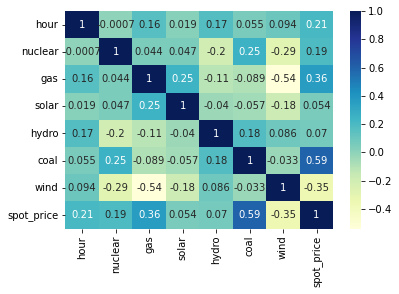

In [27]:
#Correlation Matrix
matrix = energy_spot_price.corr()
import seaborn as sb
dataplot = sb.heatmap(matrix,cmap="YlGnBu", annot=True)

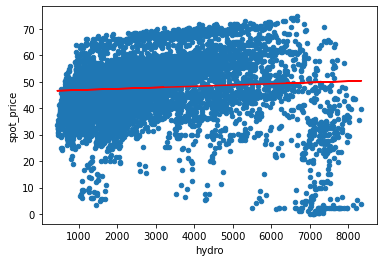

In [28]:
# There is no obvious relationship between hydro and the spot price. However, when hydro production is very high, the spot price tends to be lower than average.
energy_spot_price.plot(x="hydro", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["hydro"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["hydro"], m*energy_spot_price["hydro"] + b, color = 'red')

In [29]:
# Regression Analysis for hydro
hydro_model = ols("hydro ~ spot_price", data=energy_spot_price).fit()
print(hydro_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  hydro   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.03
Date:                Mon, 23 Jan 2023   Prob (F-statistic):           5.68e-11
Time:                        12:00:27   Log-Likelihood:                -76886.
No. Observations:                8737   AIC:                         1.538e+05
Df Residuals:                    8735   BIC:                         1.538e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2309.3117     77.234     29.900      0.0

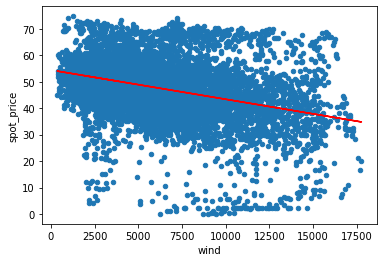

In [30]:
#2 Wind production has a negative correlation with spot price
energy_spot_price.plot(x="wind", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["wind"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["wind"], m*energy_spot_price["wind"] + b, color = 'red')

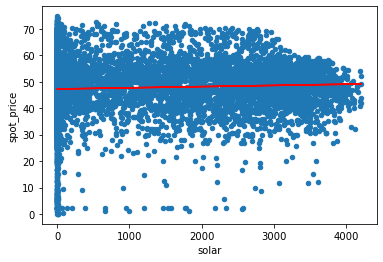

In [31]:
#3 Solar production has no obvious impact on spot price
energy_spot_price.plot(x="solar", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["solar"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["solar"], m*energy_spot_price["solar"] + b, color = 'red')

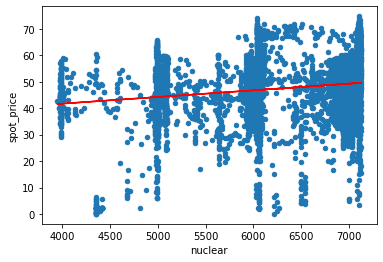

In [32]:
#4 Nuclear production is high when spot price is high 
energy_spot_price.plot(x="nuclear", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["nuclear"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["nuclear"], m*energy_spot_price["nuclear"] + b, color = 'red')

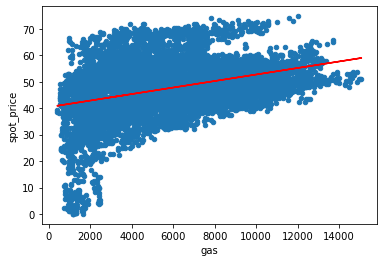

In [33]:
#5 Gas production has a positive correlation with spot price 
energy_spot_price.plot(x="gas", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["gas"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["gas"], m*energy_spot_price["gas"] + b, color = 'red')

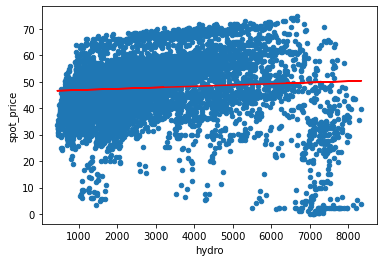

In [34]:
#6 Coal production has a positive correlation with spot price
energy_spot_price.plot(x="hydro", y="spot_price", kind="scatter")
m, b = np.polyfit(energy_spot_price["hydro"], energy_spot_price["spot_price"], 1)
plt.plot(energy_spot_price["hydro"], m*energy_spot_price["hydro"] + b, color = 'red')

In [35]:
# Regression analysis for coal
coal_model = ols("coal ~ spot_price", data=energy_spot_price).fit()
print(coal_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   coal   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     4699.
Date:                Mon, 23 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:00:28   Log-Likelihood:                -73235.
No. Observations:                8737   AIC:                         1.465e+05
Df Residuals:                    8735   BIC:                         1.465e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2156.7811     50.860    -42.406      0.0